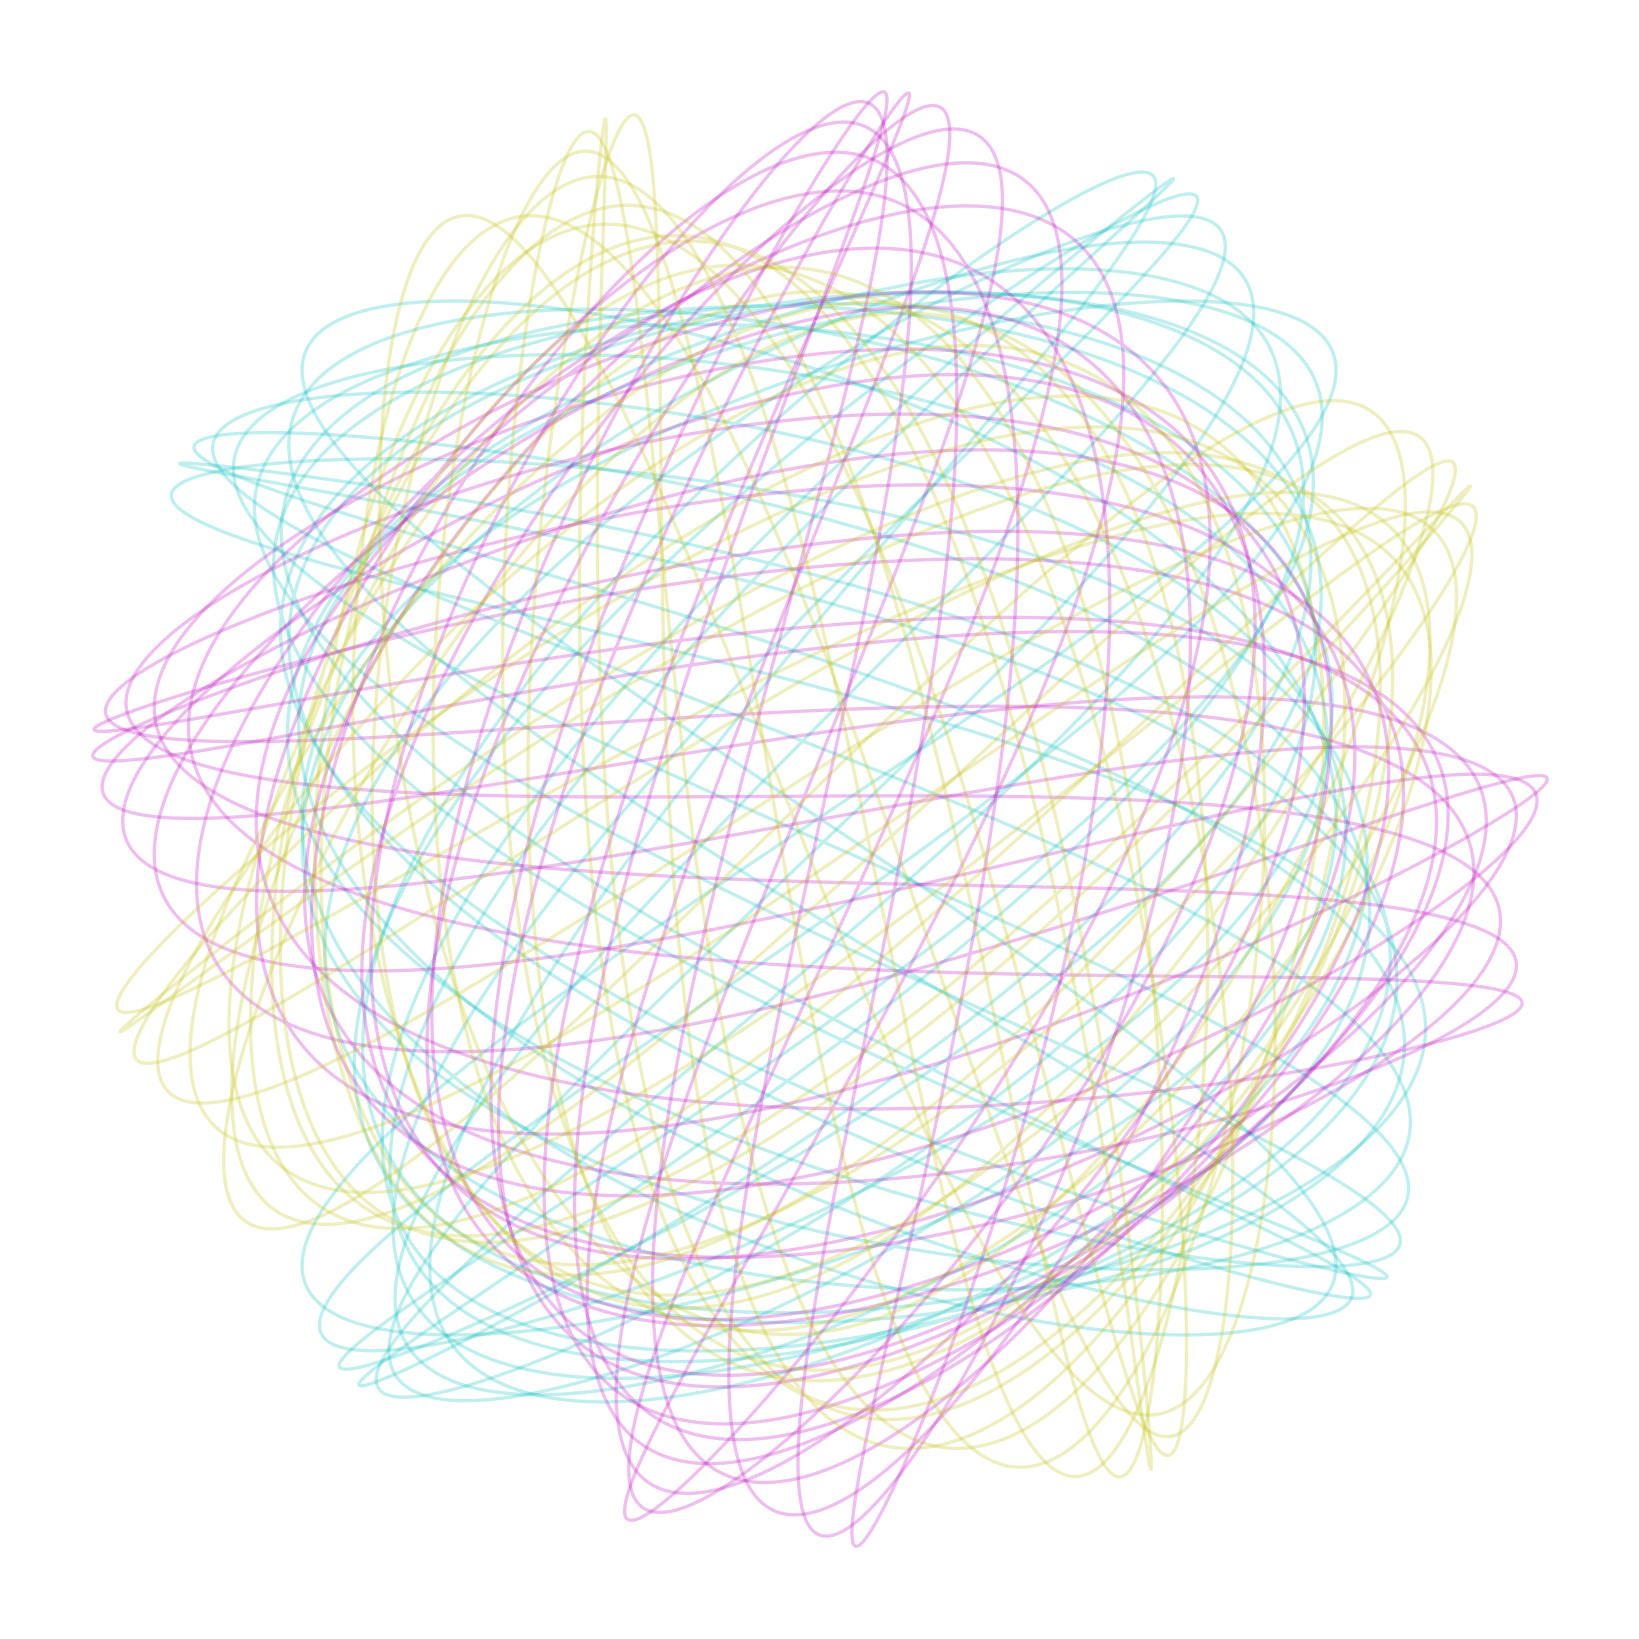

Saved: /mnt/data/cmy_lissajous_spirals.svg


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================
# CMY 3D-like Lissajous spiral interference pattern
# ==============================================================

svg_path = "/mnt/data/cmy_lissajous_spirals.svg"

# Parameters
N_LINES = 10              # number of spiral layers per color
SAMPLES = 1000            # points per line
AMPLITUDE = 1.0
FREQ_X, FREQ_Y = 3, 2     # Lissajous frequencies
PHASE_SHIFT = np.pi / 3   # between colors
SCALE_DECAY = 1.0        # shrinking scale per layer
ROT_STEP = np.pi / 90     # rotation between successive spirals
ALPHA = 0.25
LW = 1.2

colors = ["c", "m", "y"]
rng = np.random.default_rng(1)

# ==============================================================
# Function to generate a Lissajous-like spiral
# ==============================================================

def lissajous_spiral(a=1.0, bx=3, by=2, phase=0.0, n=1000):
    t = np.linspace(0, 2*np.pi, n)
    x = np.sin(bx * t + phase) * a
    y = np.sin(by * t) * a
    return x, y

def rotate(x, y, angle):
    c, s = np.cos(angle), np.sin(angle)
    return c*x - s*y, s*x + c*y

# ==============================================================
# Plot
# ==============================================================

fig, ax = plt.subplots(figsize=(8, 8), dpi=200)
ax.set_aspect("equal")
ax.axis("off")

for ci, col in enumerate(colors):
    phase_offset = ci * PHASE_SHIFT
    base_rot = ci * np.pi / 6
    
    for i in range(N_LINES):
        scale = AMPLITUDE * (SCALE_DECAY ** i)
        rot = base_rot + i * ROT_STEP
        x, y = lissajous_spiral(a=scale, bx=FREQ_X, by=FREQ_Y, phase=phase_offset + 0.3*i)
        x, y = rotate(x, y, rot)
        ax.plot(x, y, color=col, lw=LW, alpha=ALPHA)

plt.tight_layout(pad=0)
plt.show()
#fig.savefig(svg_path, format="svg", bbox_inches="tight", pad_inches=0)
print("Saved:", svg_path)


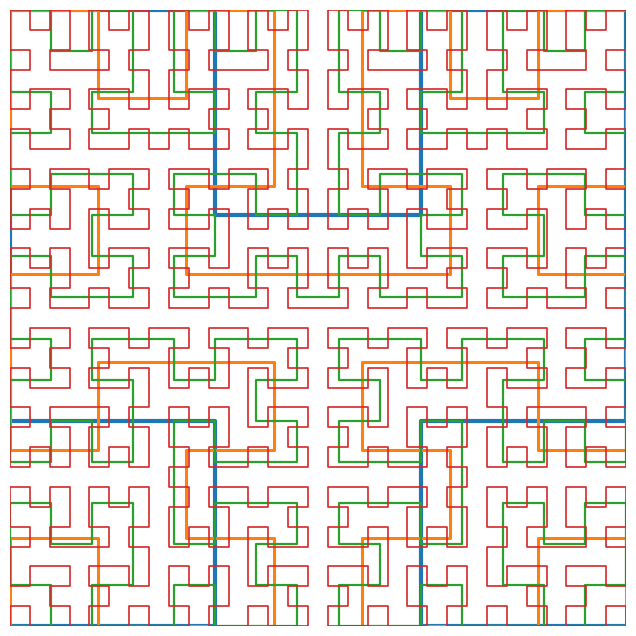

Saved 00_hilvert.svg


In [18]:
# Hilbert curve overlay for 4 iterations (orders 1..4)
# Generates and plots the curves with 4 different colors, then saves as SVG.

import numpy as np
import matplotlib.pyplot as plt

def _rot(n, x, y, rx, ry):
    if ry == 0:
        if rx == 1:
            x = n - 1 - x
            y = n - 1 - y
        x, y = y, x
    return x, y

def _d2xy(n, d):
    """Map Hilbert index d to 2D grid coordinates (x, y) for an n x n grid (n is power of 2)."""
    x = y = 0
    s = 1
    t = d
    while s < n:
        rx = 1 & (t // 2)
        ry = 1 & (t ^ rx)
        x, y = _rot(s, x, y, rx, ry)
        x += s * rx
        y += s * ry
        t //= 4
        s *= 2
    return x, y

def hilbert_points(order):
    """Return points along a Hilbert curve of given order, normalized to [0, 1] x [0, 1]."""
    n = 2 ** order
    total = n * n
    pts = np.empty((total, 2), dtype=float)
    for d in range(total):
        x, y = _d2xy(n, d)
        pts[d] = (x, y)
    # normalize to [0,1]
    pts /= (n - 1)
    return pts

# Plot settings
orders = [2,3,4,5]          # four iterations
colors = ["C0", "C1", "C2", "C3"]
linewidths = [3.0, 2.2, 1.6, 1.2]
figsize = (8, 8)
outfile = "00_hilvert.svg"

fig, ax = plt.subplots(figsize=figsize)

for o, c, lw in zip(orders, colors, linewidths):
    pts = hilbert_points(o)
    ax.plot(pts[:, 0], pts[:, 1], c=c, lw=lw, solid_joinstyle="round", solid_capstyle="round", label=f"Order {o}")

ax.set_aspect("equal", adjustable="box")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
#ax.legend(loc="upper left", frameon=False)

plt.savefig(outfile, format="svg", bbox_inches="tight")
plt.show()

print(f"Saved {outfile}")
